# Continuous Control

---

### 1. Start the Environment

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1599999964237213


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import torch
import time

from collections import deque
from ddpg.ddpg_agent import Agent

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def ddpg(n_episodes=2500, max_t=1000, print_every=1):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes  (int)   : maximum number of training episodes
        max_t       (int)   : maximum number of timesteps per episode
        print_every (int)   : interval to display results

    """
    mean_scores = []                               # list of mean scores from each episode
    moving_avgs = []                               # list of moving averages
    best_score  = -np.inf
    scores_window = deque(maxlen=100)              # mean scores from most recent 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        agent.reset()
        
        start_time = time.time()
        
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
            
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)             
                
            states = next_states
            scores += rewards        
            
            if np.any(dones):                                   # exit loop when episode ends
                break

        duration = time.time() - start_time
        
        mean_scores.append(np.mean(scores))           # save mean score for the episode
        scores_window.append(mean_scores[-1])         # save mean score to window
        moving_avgs.append(np.mean(scores_window))    # save moving average
                
        if i_episode % print_every == 0:
            print('\rEpisode {} ({} sec)\tMean Score: {:.1f}\tMoving Avg: {:.1f}'.format(\
                  i_episode, round(duration), mean_scores[-1], moving_avgs[-1]))
                  
        if moving_avgs[-1] >= 30.00 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avgs[-1]))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return mean_scores, moving_avgs

In [8]:
start_time = time.time()

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=41)

In [10]:
scores, moving_avgs = ddpg()
end_time = time.time()

Episode 1 (8 sec)	Mean Score: 0.0	Moving Avg: 0.0
Episode 2 (8 sec)	Mean Score: 1.2	Moving Avg: 0.6
Episode 3 (8 sec)	Mean Score: 0.5	Moving Avg: 0.6
Episode 4 (8 sec)	Mean Score: 1.4	Moving Avg: 0.8
Episode 5 (8 sec)	Mean Score: 0.6	Moving Avg: 0.7
Episode 6 (8 sec)	Mean Score: 0.9	Moving Avg: 0.8
Episode 7 (8 sec)	Mean Score: 0.8	Moving Avg: 0.8
Episode 8 (8 sec)	Mean Score: 0.7	Moving Avg: 0.8
Episode 9 (8 sec)	Mean Score: 0.9	Moving Avg: 0.8
Episode 10 (9 sec)	Mean Score: 1.7	Moving Avg: 0.9
Episode 11 (8 sec)	Mean Score: 0.7	Moving Avg: 0.9
Episode 12 (8 sec)	Mean Score: 0.4	Moving Avg: 0.8
Episode 13 (8 sec)	Mean Score: 1.2	Moving Avg: 0.8
Episode 14 (8 sec)	Mean Score: 0.5	Moving Avg: 0.8
Episode 15 (8 sec)	Mean Score: 1.1	Moving Avg: 0.8
Episode 16 (8 sec)	Mean Score: 0.7	Moving Avg: 0.8
Episode 17 (8 sec)	Mean Score: 0.5	Moving Avg: 0.8
Episode 18 (8 sec)	Mean Score: 0.8	Moving Avg: 0.8
Episode 19 (9 sec)	Mean Score: 0.4	Moving Avg: 0.8
Episode 20 (8 sec)	Mean Score: 0.8	Movin

Episode 165 (9 sec)	Mean Score: 4.4	Moving Avg: 4.9
Episode 166 (9 sec)	Mean Score: 9.5	Moving Avg: 4.9
Episode 167 (9 sec)	Mean Score: 6.8	Moving Avg: 4.9
Episode 168 (9 sec)	Mean Score: 8.5	Moving Avg: 5.0
Episode 169 (9 sec)	Mean Score: 6.0	Moving Avg: 5.0
Episode 170 (9 sec)	Mean Score: 7.4	Moving Avg: 5.0
Episode 171 (9 sec)	Mean Score: 8.0	Moving Avg: 5.1
Episode 172 (9 sec)	Mean Score: 7.9	Moving Avg: 5.1
Episode 173 (9 sec)	Mean Score: 7.9	Moving Avg: 5.2
Episode 174 (9 sec)	Mean Score: 11.8	Moving Avg: 5.3
Episode 175 (9 sec)	Mean Score: 11.5	Moving Avg: 5.4
Episode 176 (9 sec)	Mean Score: 10.0	Moving Avg: 5.4
Episode 177 (9 sec)	Mean Score: 10.6	Moving Avg: 5.5
Episode 178 (9 sec)	Mean Score: 10.1	Moving Avg: 5.6
Episode 179 (9 sec)	Mean Score: 7.6	Moving Avg: 5.6
Episode 180 (9 sec)	Mean Score: 6.8	Moving Avg: 5.6
Episode 181 (9 sec)	Mean Score: 13.7	Moving Avg: 5.8
Episode 182 (9 sec)	Mean Score: 7.6	Moving Avg: 5.8
Episode 183 (9 sec)	Mean Score: 16.5	Moving Avg: 5.9
Episo

Episode 319 (9 sec)	Mean Score: 34.9	Moving Avg: 24.5
Episode 320 (9 sec)	Mean Score: 32.3	Moving Avg: 24.7
Episode 321 (9 sec)	Mean Score: 34.6	Moving Avg: 24.8
Episode 322 (9 sec)	Mean Score: 33.8	Moving Avg: 25.0
Episode 323 (9 sec)	Mean Score: 35.8	Moving Avg: 25.3
Episode 324 (9 sec)	Mean Score: 31.4	Moving Avg: 25.5
Episode 325 (9 sec)	Mean Score: 35.5	Moving Avg: 25.7
Episode 326 (9 sec)	Mean Score: 30.3	Moving Avg: 25.9
Episode 327 (10 sec)	Mean Score: 23.8	Moving Avg: 26.0
Episode 328 (10 sec)	Mean Score: 24.4	Moving Avg: 26.1
Episode 329 (9 sec)	Mean Score: 38.6	Moving Avg: 26.4
Episode 330 (9 sec)	Mean Score: 35.3	Moving Avg: 26.6
Episode 331 (10 sec)	Mean Score: 26.4	Moving Avg: 26.7
Episode 332 (9 sec)	Mean Score: 34.1	Moving Avg: 26.8
Episode 333 (10 sec)	Mean Score: 34.6	Moving Avg: 26.9
Episode 334 (10 sec)	Mean Score: 31.3	Moving Avg: 27.0
Episode 335 (9 sec)	Mean Score: 25.0	Moving Avg: 27.0
Episode 336 (9 sec)	Mean Score: 34.1	Moving Avg: 27.2
Episode 337 (10 sec)	Me

In [11]:
print(f'Total time elapsed while training: {(end_time - start_time)/60.0}')

Total time elapsed while training: 53.14418986241023


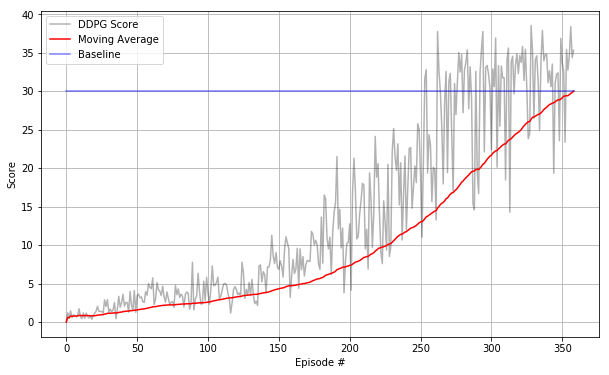

In [15]:
# plot the scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, c='k', label='DDPG Score', alpha=0.3)
plt.plot(np.arange(len(scores)), moving_avgs, c='r', label='Moving Average')
plt.plot(np.arange(len(scores)), [30.0]*len(scores), c='b', label='Baseline', alpha=0.5)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.grid()
plt.savefig('scores_plot.png')
plt.show()

In [13]:
env.close()